### Imports

In [15]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from GA.utils import get_avg_fitness, entropy
from GA.algorithm import run_ga
from metrics.lin_reg import get_fitness_lin_reg, get_fitness_log_reg, get_columns, train_lin_reg
from visualizers.plotters import plot_evolution

### Data paths

In [5]:
linear_results_path = 'data/linear_results_dict.pickle'
binary_results_path = 'data/binary_results_dict.pickle'
features_path = 'data/feature_sets.pickle'
linear_targets_path = 'data/linear_target_sets.pickle'
binary_targets_path = 'data/binary_target_sets.pickle'

### Load data

In [6]:
with open(linear_results_path, 'rb') as file:
    linear_results = pickle.load(file)

with open(binary_results_path, 'rb') as file:
    binary_results = pickle.load(file)

with open(features_path, 'rb') as file:
    feature_sets = pickle.load(file)

with open(linear_targets_path, 'rb') as file:
    linear_target_sets = pickle.load(file)

with open(binary_targets_path, 'rb') as file:
    binary_target_sets = pickle.load(file)


### Evaluate results

In [10]:
errors = {}
for target_key in linear_target_sets.keys():
    errors[target_key] = {}
    for feature_key in feature_sets.keys():
        features = feature_sets[feature_key]
        targets = linear_target_sets[target_key]
        initial_mse, initial_mae, = get_fitness_lin_reg(features.to_numpy(), targets.to_numpy(), n_splits=5, include_mae=True)
        bitstring = linear_results[target_key][feature_key]
        final_mse, final_mae = get_fitness_lin_reg(get_columns(features, bitstring), targets.to_numpy(), n_splits=5, include_mae=True)
        errors[target_key][feature_key] = {
            'initial_mse': initial_mse,
            'final_mse': final_mse,
            'initial_mae': initial_mae,
            'final_mae': final_mae
        }

In [11]:
scores = {}
for target_key in binary_target_sets.keys():
    scores[target_key] = {}
    for feature_key in feature_sets.keys():
        features = feature_sets[feature_key]
        targets = binary_target_sets[target_key]
        initial_score = get_fitness_log_reg(features.to_numpy(), targets.to_numpy(), n_splits=5)
        bitstring = binary_results[target_key][feature_key]
        final_score = get_fitness_log_reg(get_columns(features, bitstring), targets.to_numpy(), n_splits=5)
        scores[target_key][feature_key] = {
            'initial_score': initial_score,
            'final_score': final_score
        }

In [12]:
for key in errors.keys():
    print('\n', key)
    display(pd.DataFrame(errors[key]))


 player_season_obv_90_next_season


,two_season,two_season_soccermix_history,two_season_soccermix_all
initial_mse,0.006442,0.006836,0.005109
final_mse,0.005865,0.005884,0.004425
initial_mae,0.058886,0.060915,0.052696
final_mae,0.056243,0.056223,0.048957



 player_season_obv_dribble_carry_90_next_season


,two_season,two_season_soccermix_history,two_season_soccermix_all
initial_mse,0.003436,0.003501,0.002224
final_mse,0.003085,0.003072,0.001979
initial_mae,0.040415,0.041534,0.032619
final_mae,0.038085,0.038611,0.030375



 player_season_obv_pass_90_next_season


,two_season,two_season_soccermix_history,two_season_soccermix_all
initial_mse,0.006390,0.006790,0.004761
final_mse,0.005960,0.005909,0.004113
initial_mae,0.059365,0.061243,0.050788
final_mae,0.057083,0.056945,0.047012



 player_season_obv_shot_90_next_season


,two_season,two_season_soccermix_history,two_season_soccermix_all
initial_mse,0.007701,0.007449,0.007440
final_mse,0.006553,0.006583,0.006397
initial_mae,0.058314,0.057607,0.059247
final_mae,0.052640,0.053432,0.053629



 player_season_obv_defensive_action_90_next_season


,two_season,two_season_soccermix_history,two_season_soccermix_all
initial_mse,0.006706,0.007349,0.006600
final_mse,0.006329,0.006343,0.005657
initial_mae,0.058214,0.061733,0.058518
final_mae,0.056220,0.056628,0.053380


In [13]:
for key in scores.keys():
    print('\n', key)
    display(pd.DataFrame(scores[key]))


 player_season_obv_90_increase


,two_season,two_season_soccermix_history,two_season_soccermix_all
initial_score,0.687057,0.687059,0.739940
final_score,0.711328,0.713857,0.757689



 player_season_obv_dribble_carry_90_increase


,two_season,two_season_soccermix_history,two_season_soccermix_all
initial_score,0.662798,0.652655,0.721827
final_score,0.692495,0.689600,0.750086



 player_season_obv_pass_90_increase


,two_season,two_season_soccermix_history,two_season_soccermix_all
initial_score,0.633827,0.626213,0.696851
final_score,0.666422,0.658818,0.725826



 player_season_obv_shot_90_increase


,two_season,two_season_soccermix_history,two_season_soccermix_all
initial_score,0.700107,0.695754,0.697569
final_score,0.730893,0.727631,0.728358



 player_season_obv_defensive_action_90_increase


,two_season,two_season_soccermix_history,two_season_soccermix_all
initial_score,0.707725,0.703381,0.720042
final_score,0.738879,0.739961,0.756974


In [ ]:
for target_key in linear_target_sets.keys():
    errors[target_key] = {}
    for feature_key in feature_sets.keys():
        features = feature_sets[feature_key]
        targets = linear_target_sets[target_key]
        bitstring = linear_results[target_key][feature_key]
        print(bitstring)

In [ ]:
# columns_included = []
# for key in linear_results:
#     bitstring = linear_results[key]['final_bitstring']
#     columns = [int(b) for b in bitstring]
#     columns_included.append(columns)

# columns_included = np.array(columns_included)
# res = np.sum(columns_included, axis=0)

In [ ]:
not_used = features.iloc[:, col_indexes_not_used]
not_used.columns

In [ ]:
# _bitstring = ''.join(['1' if bit > 1 else '0' for bit in res])
# _bitstring = final_population[0].genotype
_bitstring = results['player_season_obv_90_next_season']['two_season_soccermix_history']['final_bitstring']

In [ ]:
_bitstring 

In [17]:
features = feature_sets['two_season']
targets = linear_target_sets['player_season_obv_90_next_season']
_bitstring = linear_results['player_season_obv_90_next_season']['two_season']
model = train_lin_reg(get_columns(features, _bitstring), targets.to_numpy())

col_indexes_used = []
col_indexes_not_used = []
for i in range(len(_bitstring)):
    if _bitstring[i] == '1':
        col_indexes_used.append(i)
    else:
        col_indexes_not_used.append(i)

_features = features.iloc[:, col_indexes_used]

<AxesSubplot:>

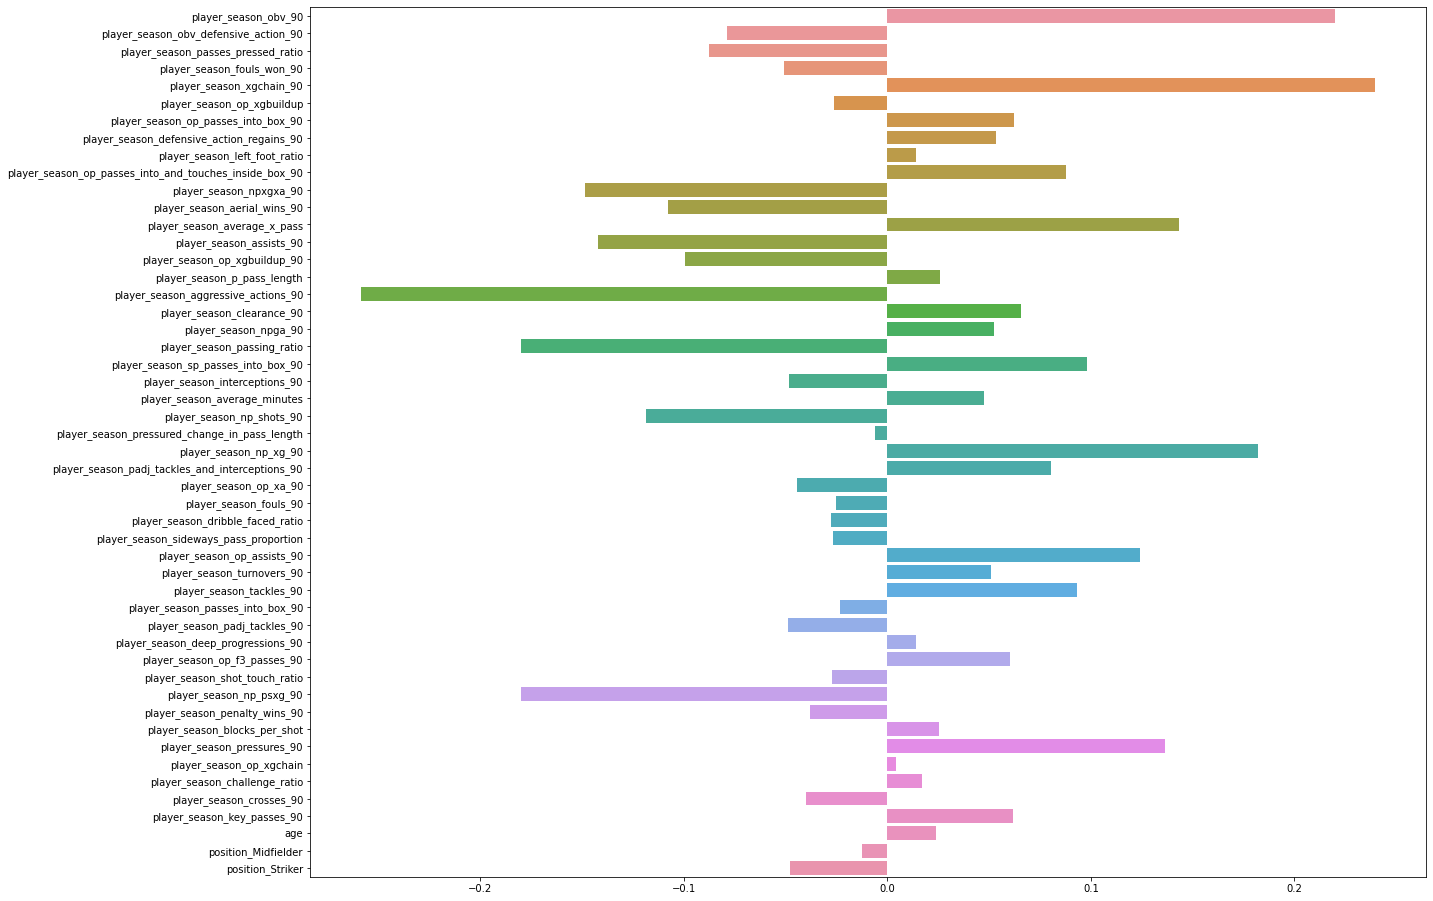

In [27]:
coeff_series = pd.Series(model.coef_, _features.columns)
# coeff_series = coeff_series.drop([
#     # 'player_season_ot_shots_faced_ratio',
#     'player_season_ot_shots_faced_90',
#     'player_season_gsaa_ratio',
#     # 'player_season_np_psxg_faced_90',
#     'player_season_goals_faced_90',
#     'player_season_clcaa',
#     'player_season_gsaa_90',
#     # 'player_season_npot_psxg_faced_90',
#     # 'player_season_da_aggressive_distance',
#     # 'player_season_xs_ratio',
#     'league_market_value',
#     'league_market_value_next_season',
#     'league_market_value_diff'
# ])
plt.rcParams["figure.figsize"] = (20, 16)  # set plot size
sns.barplot(x=coeff_series.values, y=coeff_series.index)

In [19]:
print('Columns that did not make it: ')
list(features.iloc[:, col_indexes_not_used].columns)

Columns that did not make it: 


['player_season_obv_dribble_carry_90',
 'player_season_obv_pass_90',
 'player_season_obv_shot_90',
 'player_season_sp_key_passes_90',
 'player_season_dribbles_90',
 'player_season_long_balls_90',
 'player_season_xgbuildup',
 'player_season_unpressured_long_balls_90',
 'player_season_op_f3_sideways_pass_proportion',
 'player_season_pressured_pass_length_ratio',
 'player_season_box_cross_ratio',
 'player_season_red_cards_90',
 'player_season_fhalf_counterpressures_90',
 'player_season_conversion_ratio',
 'player_season_padj_pressures_90',
 'player_season_average_x_defensive_action',
 'player_season_through_balls_90',
 'player_season_penalty_conversion_ratio',
 'player_season_total_dribbles_90',
 'player_season_xgchain_per_possession',
 'player_season_pressured_long_balls_90',
 'player_season_op_xgchain_90',
 'player_season_fhalf_ball_recoveries_90',
 'player_season_op_f3_forward_pass_proportion',
 'player_season_np_xg_per_shot',
 'player_season_passes_inside_box_90',
 'player_season_pres

In [ ]:
coeff_series = pd.Series(model.coef_, _features.columns)
coeff_series = coeff_series['pass_0_1': 'bad_touch_4']
plt.rcParams["figure.figsize"] = (20, 30)  # set plot size
sns.barplot(x=coeff_series.values, y=coeff_series.index)

In [ ]:
num_runs = 100

counter = 0
rel_changes = []
for i in range(num_runs):
    baseline_mse = get_fitness(features, targets, random_state=i)
    if baseline_mse > 100:
        continue
    new_mse = get_fitness(get_columns(features, _bitstring), targets, random_state=i)
    rel_changes.append((baseline_mse - new_mse) / baseline_mse)
    if new_mse < baseline_mse:
        counter += 1

print(counter/num_runs)
print(np.mean(rel_changes))